# MTA Customer Feedback Data (2014-2019)

[Source Link](https://data.ny.gov/Transportation/MTA-Customer-Feedback-Data-Beginning-2014/tppa-s6t6)

[Data Dictionary](https://data.ny.gov/api/views/tppa-s6t6/files/647be5e6-126f-47f2-8fa0-6175ccedda89?download=true&filename=MTA_CustomerFeedbackRightNowData_DataDictionary.pdf)

This dataset is generated from the Customer Relationship Management System. This system allows the public to correspond to the MTA about complaints or commendations in a variety of categories. The dataset contains information about areas of customer service and how that service was rated.


## Findings

- 623,757 records in MTA original customer feedback dataset
- 307,078 customer feedback accounts for NYC Buses or 49.23% of the total records
- 293,093 are bus complaints or 95.45% of NYC Buses customer feedback data
- 2,763 complaints directly related to accessibility
- 1,539


In [81]:
import pandas as pd 
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [82]:
df = pd.read_csv('../MTA_data/MTA_Customer_Feedback/ORIGINAL_MTA_Customer_Feedback_Data__Beginning_2014.csv')

In [90]:
df.shape

(623757, 8)

In [83]:
df.head()

,Agency,Commendation or Complaint,Subject Matter,Subject Detail,Issue Detail,Year,Quarter,Branch/Line/Route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,Q46


In [84]:
# Column Names
# - Replacing empty space between words with an underscore
# - Lowercasing all column names 

df.columns = df.columns.str.replace(' ', '_').str.lower()

In [85]:
# Column Name
# Going to also rename Branch/Line/Route to branch_line_route
df = df.rename(columns={'branch/line/route':'branch_line_route'})

In [86]:
df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
0,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B67
1,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,SIM33C
2,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,B8
3,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,BM4
4,Buses,Commendation,Employee,Bus Operator / Driver,Customer Service / Behavior,2019.0,4.0,Q46


<br>

<div class="alert alert-block alert-info">
<b>Note:</b> <b>Data Dictionary Referenced</b> 

Below are the data subcategories for the data label(column) considered valid values by MTA's Data Dictionary
</div>



<b> Agency</b>
- Long Island Rail Road
- Metro-North Railroad
- NYC Buses
- Subways   

In [87]:
df['agency'].value_counts()

NYC Buses                   300660
Subways                     220800
Long Island Rail Road        53179
Metro-North Railroad         42601
Buses                         6418
MTA Corporate Office            83
MTA Capital Construction        13
Agency                           2
MTA Board                        1
Name: agency, dtype: int64

In [88]:
# Merging Buses to NYC Buses since they are identified that way in the data dictionary document
df['agency'] = df['agency'].replace({'Buses': 'NYC Buses'})

In [9]:
# Confirming Subways was merged 
df['agency'].value_counts()

NYC Buses                   307078
Subways                     220800
Long Island Rail Road        53179
Metro-North Railroad         42601
MTA Corporate Office            83
MTA Capital Construction        13
Agency                           2
MTA Board                        1
Name: agency, dtype: int64

<b>Since the main focus for this analysis is on NYC Buses, I will be removing all other agencies from the dataset</b>

In [10]:
df = df[df['agency'] == 'NYC Buses']

In [11]:
# Confirming that 
df['agency'].value_counts()

NYC Buses    307078
Name: agency, dtype: int64

In [12]:
df['commendation_or_complaint'].value_counts()

Complaint       293093
Commendation     13985
Name: commendation_or_complaint, dtype: int64

<div class="alert alert-block alert-info">
<b>Note:</b> <b>Data Dictionary Referenced</b> 

Below are the data subcategories for the data label(column) considered valid values by MTA's Data Dictionary
</div>



<b> Subject Matter </b>
- Buses
- Commendation 
- Complaint
- Customer
- Employees
- Ferry Service – Hudson River
- MetroCard/Tickets/EZ-Pass & Tolls 
- MTA Agency Cars / Trucks
- Policies, Rules & Regulations
- Public Hearing
- Schedules / Reservations
- Station/Bus Stop/Facility/Structure 
- Telephone / Web Site / Mobile Apps  Trains
- Travel Disruption / Trip Problem

In [13]:
df['subject_matter'].value_counts()

Employees                                 171434
Travel Disruption / Trip Problem           77981
Buses                                      26200
Station /Bus Stop /Facility /Structure     13611
Telephone / Website / Mobile Apps           3563
Employee                                    3479
Schedules / Reservations                    2646
Service                                     2007
MetroCard/Tickets/E-Zpass & Tolls           1786
Customer                                    1655
Policies, Rules & Regulations               1526
Bus                                          570
Bus Stop                                     270
MTA Agency Cars / Trucks                     139
Complaint                                    107
Reasonable Modification                       40
Other                                         34
Public Hearing                                15
Commendation                                  12
Bus Operator / Driver                          3
Name: subject_matter

In [14]:
# Employee can be merged to Employees

df['subject_matter'] = df['subject_matter'].replace({'Employee': 'Employees'})

# Bus Operator/Driver can be merged with Employees
df['subject_matter'] = df['subject_matter'].replace({'Bus Operator / Driver': 'Employees'})


# Bus Stop can be merged to Station/Bus Stop/Facility/Structure
df['subject_matter'] = df['subject_matter'].replace({'Bus Stop': 'Station /Bus Stop /Facility /Structure'})

# Bus is merged with Buses
df['subject_matter'] = df['subject_matter'].replace({'Bus': 'Buses'})



In [15]:
df['subject_matter'].value_counts()

Employees                                 174916
Travel Disruption / Trip Problem           77981
Buses                                      26770
Station /Bus Stop /Facility /Structure     13881
Telephone / Website / Mobile Apps           3563
Schedules / Reservations                    2646
Service                                     2007
MetroCard/Tickets/E-Zpass & Tolls           1786
Customer                                    1655
Policies, Rules & Regulations               1526
MTA Agency Cars / Trucks                     139
Complaint                                    107
Reasonable Modification                       40
Other                                         34
Public Hearing                                15
Commendation                                  12
Name: subject_matter, dtype: int64

In [16]:
# Removing empty subcategories with "/"
df['subject_matter'] = df['subject_matter'].str.replace('Travel Disruption / Trip Problem', 'Travel Disruption/Trip Problem')
df['subject_matter'] = df['subject_matter'].str.replace('Station /Bus Stop /Facility /Structure', 'Station/Bus Stop/Facility/Structure')
df['subject_matter'] = df['subject_matter'].str.replace('Telephone / Website / Mobile Apps', 'Telephone/Website/Mobile Apps')
df['subject_matter'] = df['subject_matter'].str.replace('Schedules / Reservations', 'Schedules/Reservations')
df['subject_matter'] = df['subject_matter'].str.replace('MTA Agency Cars / Trucks', 'MTA Agency Cars/Trucks')


In [17]:
df['subject_matter'].value_counts()

Employees                              174916
Travel Disruption/Trip Problem          77981
Buses                                   26770
Station/Bus Stop/Facility/Structure     13881
Telephone/Website/Mobile Apps            3563
Schedules/Reservations                   2646
Service                                  2007
MetroCard/Tickets/E-Zpass & Tolls        1786
Customer                                 1655
Policies, Rules & Regulations            1526
MTA Agency Cars/Trucks                    139
Complaint                                 107
Reasonable Modification                    40
Other                                      34
Public Hearing                             15
Commendation                               12
Name: subject_matter, dtype: int64

In [18]:
# Removing empty spaces between /
df['subject_detail'] = df['subject_detail'].str.replace(" / ","/")

# Replace string No Value to nan
# df['subject_detail'] = df['subject_detail'].str.replace("No Value","")

# Correct spelling mistake and group with similar group 
df['subject_detail'] = df['subject_detail'].str.replace("Rude Impropper Language","Rude/Improper Language")

# df['subject_detail'] = df['subject_detail'].str.replace("","")

# Three subcategories with tickets, grouping them with Ticket Machines
df['subject_detail'] = df['subject_detail'].str.replace("Tickets","Ticket Machines")
df['subject_detail'] = df['subject_detail'].str.replace("Ticket Machine","Ticket Machines")


# Three subcategories with bus dispatcher 

df['subject_detail'] = df['subject_detail'].str.replace("Bus Dispatcher","Bus Operator/Driver")
# df['subject_detail'] = df['subject_detail'].str.replace("Bus Dispatcher","Bus Operator/Driver")


In [19]:
df['subject_detail'].value_counts()

Bus Operator/Driver              167398
Bus/Vehicle - General             95558
No Value                          11274
Ticket Machiness                   7062
Bus Stop                           4928
                                  ...  
Weapons/Dangerous Instruments         1
Illegal Merchandise Sales             1
Alcohol Consumption                   1
Littering                             1
Open Containers                       1
Name: subject_detail, Length: 101, dtype: int64

In [20]:
# df['subject_detail'].value_counts().nlargest(60)

In [21]:
# df['subject_detail'].value_counts().nsmallest(52)

In [22]:
# create a dataframe with issue detail feature with total counts throughout all years, was taken to excel sheet for further exploration to topic

valuecounts_issues = df['issue_detail'].value_counts().to_frame('counts')

In [23]:
valuecounts_issues

,counts
Late / Delay,54695
Flagging / Failed To Stop,32880
Rude / Inappropriate Language,25321
Reckless Driving,22918
Failure To Make Scheduled Stop,13085
...,...
Failure to make scheduled stop,1
Very Helpful/Friendly,1
Did not adjust boarding location,1
Trespass,1


In [24]:
# exported dataframe to csv 
# valuecounts_issues.to_csv('value_counts_issue_detail.csv')

In [25]:
df['year'].value_counts()

2019.0    79310
2016.0    63062
2018.0    58726
2017.0    53617
2015.0    30105
2014.0    22258
Name: year, dtype: int64

In [26]:
df['quarter'].value_counts()

2.0    91954
4.0    81121
3.0    71009
1.0    62994
Name: quarter, dtype: int64

In [27]:
# Nice to have, look at this later 

df['branch_line_route'].value_counts().sort_values(ascending=False)

No Value    44827
M15          3292
B15          2254
B41          2229
B44          2215
            ...  
Bushwick        1
N88             1
N14             1
N2              1
N55             1
Name: branch_line_route, Length: 518, dtype: int64

## NYC Bus Complaints Data    

In [28]:
complaints_df = df[df['commendation_or_complaint'] == 'Complaint']

In [29]:
complaints_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
431,NYC Buses,Complaint,Customer,NaN,NaN,2019.0,4.0,Bx13
432,NYC Buses,Complaint,Employees,Bus Operator/Driver,Operating Performance,2019.0,4.0,Bx28
433,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019.0,4.0,S74
434,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019.0,4.0,B47
435,NYC Buses,Complaint,Employees,Bus Operator/Driver,NaN,2019.0,4.0,Q100-LTD


In [30]:
complaints_df['subject_matter'].value_counts()

Employees                              161699
Travel Disruption/Trip Problem          77981
Buses                                   26256
Station/Bus Stop/Facility/Structure     13835
Telephone/Website/Mobile Apps            3539
Schedules/Reservations                   2524
Service                                  1995
MetroCard/Tickets/E-Zpass & Tolls        1757
Customer                                 1655
Policies, Rules & Regulations            1517
MTA Agency Cars/Trucks                    139
Complaint                                 107
Reasonable Modification                    40
Other                                      34
Public Hearing                             15
Name: subject_matter, dtype: int64

In [31]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293093 entries, 431 to 620342
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   agency                     293093 non-null  object 
 1   commendation_or_complaint  293093 non-null  object 
 2   subject_matter             293093 non-null  object 
 3   subject_detail             292555 non-null  object 
 4   issue_detail               277711 non-null  object 
 5   year                       293093 non-null  float64
 6   quarter                    293093 non-null  float64
 7   branch_line_route          292202 non-null  object 
dtypes: float64(2), object(6)
memory usage: 20.1+ MB


In [32]:
# Converting year and quarter columns from float64 to integers 
complaints_df = complaints_df.astype({"year":'int', "quarter":'int'}) 

In [33]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293093 entries, 431 to 620342
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   agency                     293093 non-null  object
 1   commendation_or_complaint  293093 non-null  object
 2   subject_matter             293093 non-null  object
 3   subject_detail             292555 non-null  object
 4   issue_detail               277711 non-null  object
 5   year                       293093 non-null  int64 
 6   quarter                    293093 non-null  int64 
 7   branch_line_route          292202 non-null  object
dtypes: int64(2), object(6)
memory usage: 20.1+ MB


In [34]:
complaints_df['subject_matter'].value_counts()

Employees                              161699
Travel Disruption/Trip Problem          77981
Buses                                   26256
Station/Bus Stop/Facility/Structure     13835
Telephone/Website/Mobile Apps            3539
Schedules/Reservations                   2524
Service                                  1995
MetroCard/Tickets/E-Zpass & Tolls        1757
Customer                                 1655
Policies, Rules & Regulations            1517
MTA Agency Cars/Trucks                    139
Complaint                                 107
Reasonable Modification                    40
Other                                      34
Public Hearing                             15
Name: subject_matter, dtype: int64

In [35]:
complaints_df['subject_detail'].value_counts()

Bus Operator/Driver          154906
Bus/Vehicle - General         95220
No Value                      10805
Ticket Machiness               7054
Bus Stop                       4906
                              ...  
Employee Actions/Behavior         1
Illegal Merchandise Sales         1
Alcohol Consumption               1
Littering                         1
Open Containers                   1
Name: subject_detail, Length: 100, dtype: int64

In [36]:
# saved dataset to a csv file

# complaints_df.to_csv('mta_complaints.csv')

In [37]:
complaints_df['subject_detail'] = complaints_df['subject_detail'].str.replace('No Value', '')

In [38]:
complaints_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293093 entries, 431 to 620342
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   agency                     293093 non-null  object
 1   commendation_or_complaint  293093 non-null  object
 2   subject_matter             293093 non-null  object
 3   subject_detail             292555 non-null  object
 4   issue_detail               277711 non-null  object
 5   year                       293093 non-null  int64 
 6   quarter                    293093 non-null  int64 
 7   branch_line_route          292202 non-null  object
dtypes: int64(2), object(6)
memory usage: 20.1+ MB


In [39]:
complaints_df['subject_detail'].isna().value_counts()

False    292555
True        538
Name: subject_detail, dtype: int64

In [40]:
complaints_df['issue_detail'].isna().value_counts()

False    277711
True      15382
Name: issue_detail, dtype: int64

In [41]:
complaints_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route
431,NYC Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13
432,NYC Buses,Complaint,Employees,Bus Operator/Driver,Operating Performance,2019,4,Bx28
433,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019,4,S74
434,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47
435,NYC Buses,Complaint,Employees,Bus Operator/Driver,NaN,2019,4,Q100-LTD


In [42]:
complaints_df.shape[0]

293093

In [43]:
# total complaints by year 
pd.pivot_table(complaints_df, values="agency", index="year", aggfunc='count')

,agency
year,
2014,21081
2015,28807
2016,60654
2017,51308
2018,56066
2019,75177


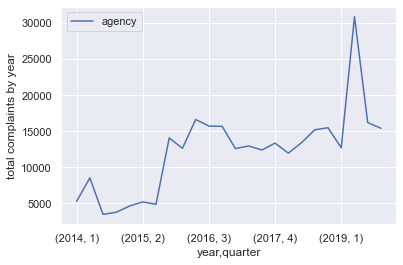

In [44]:
sns.set()
pd.pivot_table(complaints_df, values="agency", index=['year', 'quarter'], aggfunc='count').plot()
plt.ylabel('total complaints by year');

In [45]:
subject_detail_pv = pd.pivot_table(complaints_df,values="year", index='subject_detail', aggfunc='count')


In [46]:
subject_detail_pv = subject_detail_pv.sort_values('year', ascending=False)
subject_detail_pv.head(15)

,year
subject_detail,
Bus Operator/Driver,154906
Bus/Vehicle - General,95220
,10805
Ticket Machiness,7054
Bus Stop,4906
Dispatcher,1838
Mobile App,1795
Scheduled Service,1726
Schedules,1585


In [47]:
issue_detail_pv = pd.pivot_table(complaints_df,values="year", index='issue_detail', aggfunc='count')

In [48]:
issues_details_pv = issue_detail_pv.sort_values('year', ascending=False)
issues_details_pv.head(15)

,year
issue_detail,
Late / Delay,54695
Flagging / Failed To Stop,32880
Rude / Inappropriate Language,25321
Reckless Driving,22918
Failure To Make Scheduled Stop,13085
Not regulating service properly,11431
Other,9833
Closed Door Before Customer Could Board,7307
Abandoned Customer at Station/Stop,7068


In [49]:
issue_pv2 = pd.pivot_table(complaints_df,values='year', index=['issue_detail','quarter'], aggfunc='count')

In [50]:
issue_pv2 = issue_pv2.sort_values('year', ascending=False)
issue_pv2.head(15)

year
issue_detail                  quarter       
Late / Delay                  2        18049
                              4        15107
                              3        12524
Flagging / Failed To Stop     2        10462
Late / Delay                  1         9015
Flagging / Failed To Stop     4         8112
                              3         7984
Rude / Inappropriate Language 2         7965
Reckless Driving              2         7688
Rude / Inappropriate Language 4         6643
Flagging / Failed To Stop     1         6322
Reckless Driving              4         5640
Rude / Inappropriate Language 3         5567
                              1         5146
Reckless Driving              3         5053

# Identifying indicators 

- complaints directly to accessibility 
- complaints indirectly to accessibility
- complaints other/noteworthy to accessibility
- for those categories flagged directly, depending how many they are, create a bar graph by year 
- counts and total for each year comparing to perecent to bus all related complaints 

- percent of all complaints only on buses 

In [51]:
direct_labels = ['Bypassed Wheelchair','Refused Lift', 'Failed to provide satisfactory service to persons with disabilities', 'Failed to Secure Wheelchair','Refused to deploy lift', 'Departed before mobility customer was secure', 'Did not let disabled customer board' ,'Insists on securing mobility device']

In [52]:
complaints_df['accessibility_related_direct'] = complaints_df['issue_detail'].apply(lambda x: 1 if x in direct_labels else 0)

In [53]:
complaints_df['accessibility_related_direct'].value_counts()

0    290330
1      2763
Name: accessibility_related_direct, dtype: int64

In [54]:
indirect_labels = ['Snow / Ice','Unable To Exit At Station / Stop','Did not kneel/curb bus to facilitate boarding','Accessibility Due To Construction','Difficulty Boarding / Entering','Difficulty Leaving / Exiting','Accessibility due to construction']



In [55]:
complaints_df['accessibility_related_indirect'] = complaints_df['issue_detail'].apply(lambda x: 1 if x in indirect_labels else 0)


In [56]:
complaints_df['accessibility_related_indirect'].value_counts()

0    291554
1      1539
Name: accessibility_related_indirect, dtype: int64

In [57]:
other_noteworthy = ['Failure To Make Scheduled Stop','Early','Crowding','Bypassed Requested Stop','Bypassed Requested Stop','Bunching',]

In [58]:
complaints_df['quality_other_noteworthy_complaint'] = complaints_df['issue_detail'].apply(lambda x: 1 if x in indirect_labels else 0)


In [59]:
complaints_df['quality_other_noteworthy_complaint'].value_counts()

0    291554
1      1539
Name: quality_other_noteworthy_complaint, dtype: int64

In [60]:
complaints_df.head()

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route,accessibility_related_direct,accessibility_related_indirect,quality_other_noteworthy_complaint
431,NYC Buses,Complaint,Customer,NaN,NaN,2019,4,Bx13,0,0,0
432,NYC Buses,Complaint,Employees,Bus Operator/Driver,Operating Performance,2019,4,Bx28,0,0,0
433,NYC Buses,Complaint,Buses,NaN,Appearance / Cleanliness,2019,4,S74,0,0,0
434,NYC Buses,Complaint,Service,Scheduled Service,Operating Conditions / Availability,2019,4,B47,0,0,0
435,NYC Buses,Complaint,Employees,Bus Operator/Driver,NaN,2019,4,Q100-LTD,0,0,0


## 2763 complaints directly related to accessibility

In [61]:
direct_df =  complaints_df[complaints_df['accessibility_related_direct'] == 1]

In [62]:
direct_df = direct_df.reset_index()
direct_df.head()

,index,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route,accessibility_related_direct,accessibility_related_indirect,quality_other_noteworthy_complaint
0,10594,NYC Buses,Complaint,Employees,Bus Operator/Driver,Did not let disabled customer board,2019,4,M102,1,0,0
1,10700,NYC Buses,Complaint,Employees,Bus Operator/Driver,Did not let disabled customer board,2019,4,B47,1,0,0
2,10703,NYC Buses,Complaint,Employees,Bus Operator/Driver,Did not let disabled customer board,2019,4,B44-SBS,1,0,0
3,10741,NYC Buses,Complaint,Employees,Bus Operator/Driver,Bypassed Wheelchair,2019,4,Q69,1,0,0
4,10805,NYC Buses,Complaint,Employees,Bus Operator/Driver,Bypassed Wheelchair,2019,4,B44,1,0,0


In [63]:
# total count of direct accessibility related complaints by year


pd.pivot_table(direct_df,values="accessibility_related_direct", index=['issue_detail', 'year'] ,aggfunc='count')

accessibility_related_direct
issue_detail                                       year                              
Bypassed Wheelchair                                2014                           140
                                                   2015                           173
                                                   2016                           181
                                                   2017                           180
                                                   2018                           163
                                                   2019                           327
Departed before mobility customer was secure       2018                             3
                                                   2019                            32
Did not let disabled customer board                2019                            27
Failed to Secure Wheelchair                        2016                            20
                                                   2017                            80
                                                   2018                            64
                                                   2019                            42
Failed to provide satisfactory service to perso... 2018                            34
                                                   2019                           333
Insists on securing mobility device                2019                             2
Refused Lift                                       2014                            70
                                                   2015                           299
                                                   2016                           247
                                                   2017                            52
                                                   2018                           218
Refused to deploy lift                             2018                            10
                                                   2019                            66

In [64]:
# total count of direct accessibility related complaints

pd.pivot_table(direct_df,values="accessibility_related_direct", index=['issue_detail'] ,aggfunc='count')

,accessibility_related_direct
issue_detail,
Bypassed Wheelchair,1164
Departed before mobility customer was secure,35
Did not let disabled customer board,27
Failed to Secure Wheelchair,206
Failed to provide satisfactory service to persons with disabilities,367
Insists on securing mobility device,2
Refused Lift,886
Refused to deploy lift,76


In [105]:
direct_df.shape[0]/complaints_df.shape[0]

0.009427041928671104

## 1539 complaints indirectly related to accessibility

In [65]:
indirect_df =  complaints_df[complaints_df['accessibility_related_indirect'] == 1]

In [79]:
# indirect_df

In [66]:
pd.pivot_table(indirect_df,values="accessibility_related_indirect", index=['issue_detail', 'year'] ,aggfunc='count')

accessibility_related_indirect
issue_detail                                  year                                
Accessibility Due To Construction             2014                              28
                                              2015                              72
                                              2016                              72
                                              2017                              14
                                              2018                              45
                                              2019                               2
Accessibility due to construction             2019                              32
Did not kneel/curb bus to facilitate boarding 2018                               3
                                              2019                             239
Difficulty Boarding / Entering                2014                              20
                                              2015                              31
                                              2016                              35
                                              2017                              14
                                              2018                              30
                                              2019                              34
Difficulty Leaving / Exiting                  2014                              11
                                              2015                              12
                                              2016                              10
                                              2017                              13
                                              2018                               4
                                              2019                               8
Snow / Ice                                    2014                               3
                                              2015                              91
                                              2016                             207
                                              2017                             154
                                              2018                              57
                                              2019                               5
Unable To Exit At Station / Stop              2014                              70
                                              2015                              34
                                              2016                              59
                                              2017                              45
                                              2018                              55
                                              2019                              30

In [67]:
pd.pivot_table(indirect_df,values="accessibility_related_indirect", index=['issue_detail'] ,aggfunc='count')

,accessibility_related_indirect
issue_detail,
Accessibility Due To Construction,233
Accessibility due to construction,32
Did not kneel/curb bus to facilitate boarding,242
Difficulty Boarding / Entering,164
Difficulty Leaving / Exiting,58
Snow / Ice,517
Unable To Exit At Station / Stop,293


In [106]:
indirect_df.shape[0]/complaints_df.shape[0]

0.005250893061246771

## 1539 other noteworthy related complaints to accessibility

In [68]:
otherworthy_df =  complaints_df[complaints_df['quality_other_noteworthy_complaint'] == 1]

In [77]:
# otherworthy_df

In [70]:
otherworthy_df.head(2)

,agency,commendation_or_complaint,subject_matter,subject_detail,issue_detail,year,quarter,branch_line_route,accessibility_related_direct,accessibility_related_indirect,quality_other_noteworthy_complaint
11688,NYC Buses,Complaint,Employees,Bus Operator/Driver,Did not kneel/curb bus to facilitate boarding,2019,4,Q50-LTD,0,1,1
11844,NYC Buses,Complaint,Employees,Bus Operator/Driver,Did not kneel/curb bus to facilitate boarding,2019,4,S53,0,1,1


In [72]:
pd.pivot_table(otherworthy_df,values="quality_other_noteworthy_complaint", index=['issue_detail', 'year'] ,aggfunc='count')



quality_other_noteworthy_complaint
issue_detail                                  year                                    
Accessibility Due To Construction             2014                                  28
                                              2015                                  72
                                              2016                                  72
                                              2017                                  14
                                              2018                                  45
                                              2019                                   2
Accessibility due to construction             2019                                  32
Did not kneel/curb bus to facilitate boarding 2018                                   3
                                              2019                                 239
Difficulty Boarding / Entering                2014                                  20
                                              2015                                  31
                                              2016                                  35
                                              2017                                  14
                                              2018                                  30
                                              2019                                  34
Difficulty Leaving / Exiting                  2014                                  11
                                              2015                                  12
                                              2016                                  10
                                              2017                                  13
                                              2018                                   4
                                              2019                                   8
Snow / Ice                                    2014                                   3
                                              2015                                  91
                                              2016                                 207
                                              2017                                 154
                                              2018                                  57
                                              2019                                   5
Unable To Exit At Station / Stop              2014                                  70
                                              2015                                  34
                                              2016                                  59
                                              2017                                  45
                                              2018                                  55
                                              2019                                  30

In [73]:
pd.pivot_table(otherworthy_df,values="quality_other_noteworthy_complaint", index=['issue_detail'] ,aggfunc='count')

,quality_other_noteworthy_complaint
issue_detail,
Accessibility Due To Construction,233
Accessibility due to construction,32
Did not kneel/curb bus to facilitate boarding,242
Difficulty Boarding / Entering,164
Difficulty Leaving / Exiting,58
Snow / Ice,517
Unable To Exit At Station / Stop,293


In [107]:
otherworthy_df.shape[0]/complaints_df.shape[0]

0.005250893061246771